In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Definition of a function which will be used later, whose task is to keep up with the connectivities when new nodes are added to the network:

In [3]:
def incr_deg(draws, degrees):
    for i in range(degrees.size):
        if i in draws:
            degrees[i] += 1
            
    return degrees

Main begins, variables are initialized: 

In [5]:
n = 3    # starting nodes
t = 1000    # nodes and time-steps    
m = 2    # links added at each time step
T = np.linspace(0.1, 10)

degrees = np.empty((T.size, t))
energy_samples = np.empty((T.size, t))
fitness = np.empty((T.size, t))
probs_list = []
Z_t = np.empty(T.size)
mu = np.empty(T.size)
factor = np.empty((T.size, t))


Simulation of the network evolution:

In [8]:
for temp in range(T.size):
    G = nx.complete_graph(n)
    
    for j in range(n):
        degrees[temp, j] = G.degree(j)
        
    for idx in range(t):        
        if idx >= n:
            draws = np.random.choice(list(range(idx)), size = m, replace = False, p = probs_list)
            G.add_node(idx)
            G.add_edges_from((idx, i) for i in draws)
            
            degrees[temp, idx] = G.degree(idx)
            degrees[temp, :] = incr_deg(draws, degrees[temp, :])
        
        energy_samples[temp, idx] = np.sqrt(np.random.uniform(0, 1))
        fitness[temp, idx] = np.exp(- energy_samples[temp, idx]/T[temp])
        factor[temp, idx] = fitness[temp, idx]*degrees[temp, idx]
        
        probs_list = [factor[temp, i]/np.sum(factor[temp, :(idx+1)]) for i in range(idx+1)]        
        
    Z_t[temp] = np.sum([degrees[temp, node] * np.exp(-1/T[temp] * energy_samples[temp, node]) for node in range(t)])
    mu[temp] = -T[temp] * np.log(Z_t[temp]/(m*t))

*energy_samples* is a numpy array whose elements are samples drawn from the distribution $g(\epsilon) = C\epsilon^{\theta}$. \
Since $\theta = 1$, constant is given by $C = \frac{\theta + 1}{\epsilon_{max}^{\theta + 1}} = 2$. In order to sample from this distribution, the inverse transform sampling method has been used.

Eventually, print of the critical temperature $T_{BEC}$ and plotting with *matplotlib* gives: 

Threshold temperature for BEC is  0.908


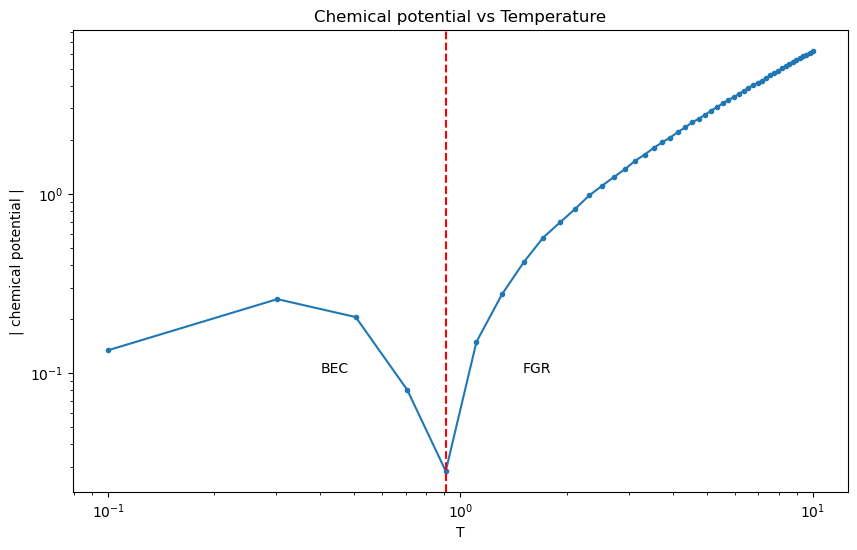

In [32]:
print("Threshold temperature for BEC is ", round(T[np.argmin(np.abs(mu))], 3))
    
plt.figure(figsize=(10, 6))
plt.plot(T, np.abs(mu), marker='.', linestyle='-')
plt.axvline(x = T[np.argmin(np.abs(mu))], color='r', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.title('Chemical potential vs Temperature')
plt.xlabel('T')
plt.ylabel('| chemical potential |')
plt.annotate('BEC', xy=(3, 5), xytext=(.4, .1))
plt.annotate('FGR', xy=(3, 5), xytext=(1.5, .1))
plt.show()

Furthermore, the acquisition of a finite fraction of links by the "winner" for the lowest temperature, besides the share of links among all the nodes with a significative fitness for the highest T, can be observed through the following plots:

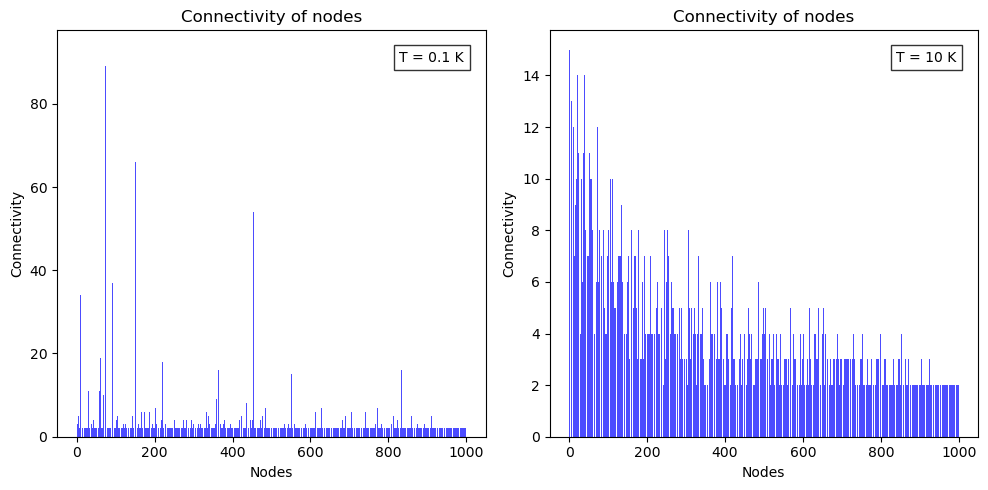

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.bar(range(t), degrees[0, :], color = 'b', alpha = 0.7)
ax1.set_title('Connectivity of nodes')
ax1.set_xlabel('Nodes')
ax1.set_ylabel('Connectivity')
ax1.text(0.95, 0.95, 'T = 0.1 K', transform=ax1.transAxes,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8))
ax2.bar(range(t), degrees[49, :], color = 'b', alpha = 0.7)
ax2.set_title('Connectivity of nodes')
ax2.set_xlabel('Nodes')
ax2.set_ylabel('Connectivity')
ax2.text(0.95, 0.95, 'T = 10 K', transform=ax2.transAxes,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()